In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import re


import pandas as pd

## Pedir el nombre del archivo .xlsx
#archivo = input("Introduce el nombre del archivo .xlsx (incluyendo la extensión): ")

# Leer el archivo
df = pd.read_excel('/content/drive/MyDrive/Desarrollo/Pruebas/nuevopruebas/df_dropclas.xlsx')


# Filtrar las filas donde el texto en la columna especificada comienza con "Nombre:"
# Reemplaza 'Descripcion' con el nombre de la columna donde están los datos a filtrar
columna_datos = 'Descripción de la orden'
df_filtrado = df[df[columna_datos].astype(str).str.startswith("Nombre:")]

#print(df_filtrado)


# Función para extraer los campos de cada texto
def extract_fields(text):
    nombre = re.search(r'Nombre:\s*([\w\s]+),', text)
    telefono = re.search(r'Teléfono:\s*(\d+),', text)
    direccion = re.search(r'Dirección Predio:\s*([\w\s#-]+),', text)
    municipio = re.search(r'Municipio:\s*([\w\s]+),', text)
    observacion = re.search(r'Observación Detalle de ubicación:\s*([\w\s]+),', text)
    tipo_dano = re.search(r'Tipo de daño:\s*([\w\s]+),', text)
    detalle_dano = re.search(r'Detalle de daño:\s*([\w\s]+)', text)

    # Extraer valores de cada campo, asignando None si no se encuentra el valor
    nombre = nombre.group(1) if nombre else None
    telefono = telefono.group(1) if telefono else None
    direccion = direccion.group(1) if direccion else None
    municipio = municipio.group(1) if municipio else None
    observacion = observacion.group(1) if observacion else None
    tipo_dano = tipo_dano.group(1) if tipo_dano else None
    detalle_dano = detalle_dano.group(1) if detalle_dano else None

    return pd.Series([nombre, telefono, direccion, municipio, observacion, tipo_dano, detalle_dano])

# Aplicar la función a cada fila de la columna 'descripcion' y crear un nuevo DataFrame
df_extraccion = df_filtrado['Descripción de la orden'].apply(extract_fields)
df_extraccion.columns = ["Nombre", "Teléfono", "Dirección Predio", "Municipio", "Observación", "Tipo de daño", "Detalle de daño"]



df1 =  pd.concat([df_filtrado, df_extraccion], axis=1)

print(df1)
# Mostrar el DataFrame resultante
#print(df_extraccion)
columnas = ["Nombre", "Teléfono", "Dirección Predio", "Municipio", "Observación", "Tipo de daño", "Detalle de daño", "out"]

dft = df1[columnas]

columna_datos = 'out'
dft = dft[~dft[columna_datos].str.contains('pendiente', case=False, na=False)]

dft.info()


                Recurso Estado de actividad  Fecha de Generación  \
1       BOLM-327 (I-27)        no realizado  18/07/2024 14:37:02   
2      BOLV-402 (M-32B)        no realizado  19/07/2024 19:21:52   
10     BOLV-366 (M-19C)        no realizado  19/07/2024 20:37:40   
12             BOLV-360        no realizado  18/07/2024 19:07:01   
19             BOLV-307        no realizado  19/07/2024 07:21:11   
...                 ...                 ...                  ...   
69572  BOLG-399 (Apoyo)           cancelada  26/08/2024 08:50:58   
69579   BOLM-361 (I-61)           cancelada  22/08/2024 08:27:12   
69580          BOLM-341           cancelada  09/08/2024 14:17:37   
69589          BOLV-226           cancelada  27/08/2024 08:12:31   
69592          BOLM-341           cancelada  27/08/2024 12:37:11   

                                 Descripción de la orden    Orden de trabajo  \
1      Nombre: Luiza Marulanda, Teléfono: 3146787741,...  ADMS-INC 146279208   
2      Nombre: Hermes L

In [ ]:
dft.head(100)

,Nombre,Teléfono,Dirección Predio,Municipio,Observación,Tipo de daño,Detalle de daño,out
19,Luis Alberto Uribe,3134857964,VDA LA DIVISA FCA LA PEQUEÑA,ROVIRA,En la vida La Divisa,Sector sin servicio,No tenemos servicio de energía,Ejecutar
25,Diego González,3014089550,CRA 11A N 10 125 PISO 2 BELENCITO,IBAGUE,Intermitente,Variación de voltaje,Bajones de voltaje,Ejecutar
26,José Antonio Bahamon,3152536790,CLL 11 N 10A-44,IBAGUE,cerca al panóptico,Sector sin servicio,No hay energía,Ejecutar
27,Wilson Trujillo,3164735919,CRA 5 CLLE 23 - 12,IBAGUE,Armario telefónico,Sector sin servicio,Falla energía,Ejecutar
36,JAVIER PANESSO,3178688449,CL 17 7 128 INT 3,ROLDANILLO,POR LA PARTE DE atrás DE LA NORMAL,Sector sin servicio,RAMAS TOCANDO LA RED,Ejecutar
...,...,...,...,...,...,...,...,...
486,Wilderson lerma,3161331147,CL 4 56B 36,BUENAVENTURA,Esquina de la calle 4,Variación de voltaje,Altibajos daño en ventiladores,Ejecutar
488,Edilberto león ospina,3108637028,MNZ B CASA 5 VILLA LEIDY,ESPINAL,vía Suárez por La primera entrada a mano izqui...,Sector sin servicio,No hay luz,Ejecutar
490,Mauricio Gómez,3102114459,VDA LA ESMERALDA FCA EL PARAISO,None,Voltaje bajito,Variación de voltaje,Face caída,Ejecutar
491,None,None,None,None,None,None,None,Ejecutar


In [ ]:
pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 33.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 18.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 19.5 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [ ]:
dft['out'] = dft['out'].str.lower()
dft['Detalle de daño'] = dft['Detalle de daño'].str.lower()

dft = dft.dropna(subset=['Detalle de daño'])

cols = ["Detalle de daño","out"]

dfn = dft[cols]

dfn.head(100)

,Detalle de daño,out
19,no tenemos servicio de energía,ejecutar
25,bajones de voltaje,ejecutar
26,no hay energía,ejecutar
27,falla energía,ejecutar
36,ramas tocando la red,ejecutar
...,...,...
611,no tengo luz,ejecutar
623,poste para reubicar,ejecutar
632,cable de poste a poste caído peligro,ejecutar
634,poste con riesgo de caída alta,ejecutar


In [ ]:
conteo_clases = dfn["out"].value_counts()
print(conteo_clases)

out
ejecutar    21231
cancelar     1973
Name: count, dtype: int64


In [ ]:
#max_count = dfn["out"].value_counts().max()
# Definir el número máximo de muestras por clase
max_count = 5000
# Sobremuestrear cada clase para tener la misma cantidad de datos que la clase mayoritaria
dfb = dfn.groupby("out").apply(lambda x: x.sample(n=max_count, replace=True, random_state=42)).reset_index(drop=True)
print(dfb["out"].value_counts())

out
cancelar    5000
ejecutar    5000
Name: count, dtype: int64


<ipython-input-7-1311a2dd0b1a>:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  dfb = dfn.groupby("out").apply(lambda x: x.sample(n=max_count, replace=True, random_state=42)).reset_index(drop=True)


In [ ]:
dfb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Detalle de daño  10000 non-null  object
 1   out              10000 non-null  object
dtypes: object(2)
memory usage: 156.4+ KB


In [ ]:
pip install --upgrade wandb


In [ ]:
from collections import Counter
from sklearn.model_selection import train_test_split
from transformers import DistilBertForSequenceClassification, DistilBertTokenizerFast, TrainingArguments, Trainer
from datasets import Dataset, DatasetDict
from sklearn.metrics import accuracy_score, f1_score
import pandas as pd
import wandb
from transformers.integrations import WandbCallback

# Inicializar WandB
wandb.init(
    project="Caller-Classification",  # Nombre del proyecto en WandB
    name="Entrenamiento DistilBERT",  # Título del experimento
    notes="Modelo entrenado por [Camilo, Cesar, Diego, Rober]",  # Notas sobre el grupo
    config={
        "learning_rate": 2e-5,
        "batch_size": 8,
        "epochs": 7,
        "model": "distilbert-base-uncased"
    }
)

# Cargar los datos
# dfb = pd.read_csv("tu_archivo.csv")  # Descomenta y ajusta si necesitas cargar desde un archivo

# Seleccionar la columna de texto y la columna de etiquetas
texts = dfb["Detalle de daño"].tolist()   # Columna de fallas
labels = dfb["out"].tolist()              # Columna de clases

# Convertir etiquetas a índices numéricos (necesario si son texto)
label_mapping = {"ejecutar": 0, "cancelar": 1}
labels = [label_mapping[label] for label in labels]

# Evaluar balance de clases
class_counts = Counter(labels)
print(f"Balance de clases: {class_counts}")

# Dividir el dataset en entrenamiento y validación
train_texts, val_texts, train_labels, val_labels = train_test_split(
    texts, labels, test_size=0.2, random_state=42, stratify=labels
)

# Procesar los textos (limpieza, stopwords, lematización)
def procesar_texto(texto):
    # Implementa tu función de preprocesamiento aquí si es necesario
    return texto

train_texts = [procesar_texto(texto) for texto in train_texts]
val_texts = [procesar_texto(texto) for texto in val_texts]

# Inicializar el tokenizer y el modelo de DistilBERT
tokenizer = DistilBertTokenizerFast.from_pretrained("distilbert-base-uncased")
model = DistilBertForSequenceClassification.from_pretrained(
    "distilbert-base-uncased",
    num_labels=2
)

# Ajustar el dropout manualmente
model.config.hidden_dropout_prob = 0.2

# Tokenizar los datos de entrenamiento y validación
train_encodings = tokenizer(train_texts, padding=True, truncation=True, max_length=128)
val_encodings = tokenizer(val_texts, padding=True, truncation=True, max_length=128)

# Crear datasets de Hugging Face
train_dataset = Dataset.from_dict({
    "input_ids": train_encodings["input_ids"],
    "attention_mask": train_encodings["attention_mask"],
    "labels": train_labels,
})
val_dataset = Dataset.from_dict({
    "input_ids": val_encodings["input_ids"],
    "attention_mask": val_encodings["attention_mask"],
    "labels": val_labels,
})

# Crear un DatasetDict para manejo estructurado
datasets = DatasetDict({
    "train": train_dataset,
    "validation": val_dataset
})

# Configurar los argumentos de entrenamiento
training_args = TrainingArguments(
    output_dir="./modelo1",
    learning_rate=2e-5,
    per_device_train_batch_size=8,
    num_train_epochs=7,
    weight_decay=0.05,
    evaluation_strategy="epoch",
    logging_dir="./logs",
    logging_steps=10,
    save_strategy="epoch",
    load_best_model_at_end=True,
    metric_for_best_model="f1",
    greater_is_better=True,
    report_to=["wandb"],
)

# Definir métricas
def compute_metrics(p):
    preds = p.predictions.argmax(axis=-1)
    labels = p.label_ids
    acc = accuracy_score(labels, preds)
    f1 = f1_score(labels, preds)
    wandb.log({"accuracy": acc, "f1": f1})
    return {"accuracy": acc, "f1": f1}

# Inicializar el entrenador
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

# Entrenar el modelo
trainer.train()

# Evaluar el modelo en el conjunto de validación
trainer.evaluate()

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Balance de clases: Counter({1: 5000, 0: 5000})


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:104: UserWarning: 
Error while fetching `HF_TOKEN` secret value from your vault: 'Requesting secret HF_TOKEN timed out. Secrets can only be fetched when running from the Colab UI.'.
You are not authenticated with the Hugging Face Hub in this notebook.
If the error persists, please let us know by opening an issue on GitHub (https://github.com/huggingface/huggingface_hub/issues/new).
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-11-a2dad64076f5>:110: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.444300,0.454306,0.803000,0.798569
2,0.235600,0.413388,0.830500,0.824443
3,0.335900,0.443840,0.847000,0.845298
4,0.238400,0.436121,0.860500,0.855365
5,0.228000,0.500573,0.856500,0.855851
6,0.284100,0.505882,0.860500,0.861263
7,0.064600,0.498441,0.864500,0.864703


{'eval_loss': 0.49844077229499817,
 'eval_accuracy': 0.8645,
 'eval_f1': 0.8647029455816275,
 'eval_runtime': 5.0826,
 'eval_samples_per_second': 393.502,
 'eval_steps_per_second': 49.188,
 'epoch': 7.0}

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from transformers import DistilBertForSequenceClassification, DistilBertTokenizerFast, TrainingArguments, Trainer
# ------------------------------------------------------------------------------------------------------
# Cargar el modelo y el tokenizador desde el directorio guardado
model = DistilBertForSequenceClassification.from_pretrained("/content/drive/MyDrive/Desarrollo/Pruebas/modelo1")
tokenizer = DistilBertTokenizerFast.from_pretrained("/content/drive/MyDrive/Desarrollo/Pruebas/modelo1")



In [4]:
#Importar librerías
from transformers import DistilBertForSequenceClassification, DistilBertTokenizerFast
from torch.utils.data import DataLoader
from sklearn.metrics import confusion_matrix
import pandas as pd
import torch
import seaborn as sns
import matplotlib.pyplot as plt

Cargar Dataset

In [5]:
df_test = pd.read_csv('/content/drive/MyDrive/Desarrollo/Pruebas/pruba19/df.csv')

Preprocesamiento del Nuevo Dataset

In [6]:
df_test['out'].value_counts().to_frame().sort_index()

,count
out,
cancelar,755
ejecutar,2295


In [8]:
# Calcular proporciones originales
class_counts = df_test["out"].value_counts()
total = class_counts.sum()
ratios = class_counts / total

# Calcular número mínimo de muestras basado en la clase menos frecuente
min_samples = min(class_counts)

# Crear un nuevo DataFrame ajustado para balancear según la clase menos frecuente
dfb = pd.concat([
    df_test[df_test["out"] == label].sample(
        n=min_samples,
        replace=False,  # No repetir muestras
        random_state=42
    )
    for label in class_counts.index
]).reset_index(drop=True)

# Verificar el balanceo final
print(dfb["out"].value_counts())


out
ejecutar    755
cancelar    755
Name: count, dtype: int64


In [9]:
# Extraer los textos y las etiquetas
test_texts = dfb['Detalle de daño'].tolist()
test_labels = dfb['out'].tolist()

# Mapear las etiquetas a índices numéricos
label_mapping = {"ejecutar": 0, "cancelar": 1}  # Ajusta este mapeo si es necesario
test_labels = [label_mapping[label] for label in test_labels]


In [10]:
# Eliminar cadenas vacías o None
test_texts = [texto for texto in test_texts if texto and isinstance(texto, str)]

Tokenizar el Nuevo Dataset

In [11]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 16.0 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [12]:
filtered_test_texts = [texto for texto in test_texts if texto and isinstance(texto, str)]
filtered_test_labels = [label for texto, label in zip(test_texts, test_labels) if texto and isinstance(texto, str)]

In [13]:
assert len(filtered_test_texts) == len(filtered_test_labels), "Las longitudes de los textos y las etiquetas no coinciden"

In [14]:
# Tokenizar el conjunto de prueba
test_encodings = tokenizer(filtered_test_texts, padding=True, truncation=True, max_length=128, return_tensors="pt")

# Crear el dataset de Hugging Face para el conjunto de prueba
from datasets import Dataset

test_dataset = Dataset.from_dict({
    "input_ids": test_encodings["input_ids"].tolist(),  # Convertimos a listas para ser compatibles con Hugging Face
    "attention_mask": test_encodings["attention_mask"].tolist(),
    "labels": filtered_test_labels,  # Usamos las etiquetas filtradas
})

# Mostrar una parte del dataset para verificar que todo está correcto
print(test_dataset)


Dataset({
    features: ['input_ids', 'attention_mask', 'labels'],
    num_rows: 1431
})


Crear el DataLoader para el Conjunto de Prueba

In [15]:
# Crear un DataLoader para el conjunto de prueba
test_dataloader = DataLoader(test_dataset, batch_size=8)


Realizar las Predicciones en el Conjunto de Prueba

In [16]:
from torch.utils.data import DataLoader
from transformers import DistilBertTokenizerFast
import torch

# Crear el DataLoader para el conjunto de prueba
batch_size = 8  # Ajusta el tamaño del lote según sea necesario

# Convertir el dataset de prueba en un DataLoader
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [17]:
for batch in test_dataloader:
    print(type(batch))  # Verificar si es una lista o un diccionario
    print(batch)  # Ver los primeros elementos del batch
    break  # Solo para imprimir una vez, ya que el dataloader es iterativo



<class 'dict'>
{'input_ids': [tensor([101, 101, 101, 101, 101, 101, 101, 101]), tensor([ 8254,  2053,  8254,  9298, 13075,  4753,  4753,  2053]), tensor([ 4372,  2702, 14262, 24076, 20469,  4012,  8254, 10974]), tensor([ 2121,  6633,  7903, 10581,  3258,  9521, 14262, 26214]), tensor([10440,  2891,  3695,  2015,  2139,  1022,  7903,   102]), tensor([ 8670, 26214,   102, 29080, 26089,   102,  3695,     0]), tensor([18902, 18499,     0,  8883,  6460,     0,   102,     0]), tensor([2050, 5684,    0,  102,  102,    0,    0,    0]), tensor([  102, 15270,     0,     0,     0,     0,     0,     0]), tensor([    0, 12821,     0,     0,     0,     0,     0,     0]), tensor([    0, 21382,     0,     0,     0,     0,     0,     0]), tensor([  0, 102,   0,   0,   0,   0,   0,   0]), tensor([0, 0, 0, 0, 0, 0, 0, 0]), tensor([0, 0, 0, 0, 0, 0, 0, 0]), tensor([0, 0, 0, 0, 0, 0, 0, 0]), tensor([0, 0, 0, 0, 0, 0, 0, 0]), tensor([0, 0, 0, 0, 0, 0, 0, 0]), tensor([0, 0, 0, 0, 0, 0, 0, 0]), tensor([0, 0, 

In [18]:
import torch
from torch.utils.data import DataLoader

def collate_fn(batch):
    # Convertir cada campo en un tensor (si aún no es un tensor)
    input_ids = torch.stack([torch.tensor(item['input_ids']) for item in batch])
    attention_mask = torch.stack([torch.tensor(item['attention_mask']) for item in batch])
    labels = torch.stack([torch.tensor(item['labels']) for item in batch])

    return {
        'input_ids': input_ids,
        'attention_mask': attention_mask,
        'labels': labels
    }

# Asegúrate de que el dataloader utilice este 'collate_fn'
test_dataloader = DataLoader(test_dataset, batch_size=32, collate_fn=collate_fn)



In [19]:
import torch

# Asegúrate de que el modelo esté en el dispositivo correcto
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)  # Mover el modelo al dispositivo adecuado

# Función para predecir con el modelo
def predict(model, dataloader):
    model.eval()  # Ponemos el modelo en modo de evaluación
    all_preds = []
    all_labels = []

    with torch.no_grad():  # Desactivamos el cálculo de gradientes para la inferencia
        for batch in dataloader:
            # Mover los tensores al dispositivo correcto (GPU o CPU)
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            # Verificar en qué dispositivo están los tensores
            print(f"Modelo está en: {model.device}")
            print(f"input_ids está en: {input_ids.device}")
            print(f"attention_mask está en: {attention_mask.device}")
            print(f"labels está en: {labels.device}")

            # Realizar las predicciones
            outputs = model(input_ids, attention_mask=attention_mask)
            logits = outputs.logits  # La salida del modelo
            preds = torch.argmax(logits, dim=-1)  # Predicción: la clase con la mayor probabilidad

            # Guardamos las predicciones y las etiquetas reales
            all_preds.extend(preds.cpu().numpy())  # Convertimos las predicciones a numpy
            all_labels.extend(labels.cpu().numpy())  # Convertimos las etiquetas a numpy

    return all_preds, all_labels

# Realizar las predicciones en el conjunto de prueba
predictions, true_labels = predict(model, test_dataloader)



Modelo está en: cuda:0
input_ids está en: cuda:0
attention_mask está en: cuda:0
labels está en: cuda:0
Modelo está en: cuda:0
input_ids está en: cuda:0
attention_mask está en: cuda:0
labels está en: cuda:0
Modelo está en: cuda:0
input_ids está en: cuda:0
attention_mask está en: cuda:0
labels está en: cuda:0
Modelo está en: cuda:0
input_ids está en: cuda:0
attention_mask está en: cuda:0
labels está en: cuda:0
Modelo está en: cuda:0
input_ids está en: cuda:0
attention_mask está en: cuda:0
labels está en: cuda:0
Modelo está en: cuda:0
input_ids está en: cuda:0
attention_mask está en: cuda:0
labels está en: cuda:0
Modelo está en: cuda:0
input_ids está en: cuda:0
attention_mask está en: cuda:0
labels está en: cuda:0
Modelo está en: cuda:0
input_ids está en: cuda:0
attention_mask está en: cuda:0
labels está en: cuda:0
Modelo está en: cuda:0
input_ids está en: cuda:0
attention_mask está en: cuda:0
labels está en: cuda:0
Modelo está en: cuda:0
input_ids está en: cuda:0
attention_mask está en: 

Generar la Matriz de Confusión

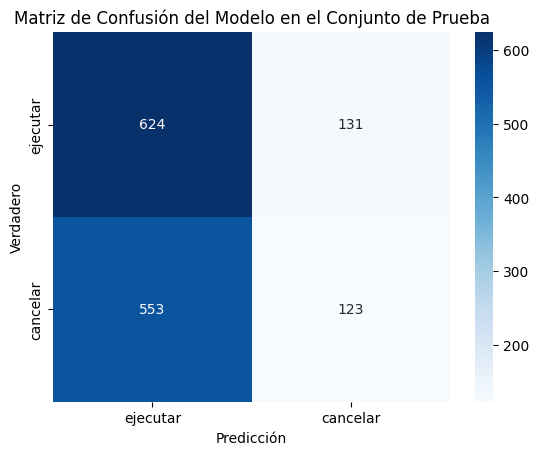

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt


# Crear la matriz de confusión
cm = confusion_matrix(true_labels, predictions)

# Mostrar la matriz de confusión con una visualización más amigable
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["ejecutar", "cancelar"], yticklabels=["ejecutar", "cancelar"])
plt.xlabel('Predicción')
plt.ylabel('Verdadero')
plt.title('Matriz de Confusión del Modelo en el Conjunto de Prueba')
plt.show()


In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report


# Calcular métricas
accuracy = accuracy_score(true_labels, predictions)
precision = precision_score(true_labels, predictions, average='weighted')
recall = recall_score(true_labels, predictions, average='weighted')
f1 = f1_score(true_labels, predictions, average='weighted')

# Mostrar métricas
print("Métricas del Modelo:")
print(f"Precisión (Accuracy): {accuracy:.2f}")
print(f"Precisión (Precision): {precision:.2f}")
print(f"Sensibilidad (Recall): {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

# Reporte detallado por clase
print("\nReporte de Clasificación:")
print(classification_report(true_labels, predictions, target_names=["ejecutar", "cancelar"]))

Métricas del Modelo:
Precisión (Accuracy): 0.52
Precisión (Precision): 0.51
Sensibilidad (Recall): 0.52
F1-Score: 0.47

Reporte de Clasificación:
              precision    recall  f1-score   support

    ejecutar       0.53      0.83      0.65       755
    cancelar       0.48      0.18      0.26       676

    accuracy                           0.52      1431
   macro avg       0.51      0.50      0.46      1431
weighted avg       0.51      0.52      0.47      1431

